In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='' # force no CUDA 

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

2021-11-24 15:41:22.893990: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-24 15:41:22.894019: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import cv2
import random

r = random.Random(1)

shape_types = ['rectangle', 'circle', 'triangle']

def make_random_image(size):
    img = np.zeros([size, size, 1], dtype=np.uint8)
    
    shape = r.choice(shape_types)
    if shape == 'rectangle':
        MIN_RECT_SIDE = 5
        left = r.randint(0, size - MIN_RECT_SIDE)
        top = r.randint(0, size - MIN_RECT_SIDE)
        width = r.randint(MIN_RECT_SIDE, size - left)
        height = r.randint(MIN_RECT_SIDE, size - top)
        cv2.rectangle(img, (left, top), (width, height), (1), cv2.FILLED)
    elif shape == 'circle':
        MIN_RADIUS = 3
        MAX_RADIUS = size // 3
        radius = r.randint(MIN_RADIUS, MAX_RADIUS)
        left = r.randint(radius, size - radius)
        top = r.randint(radius, size - radius)
        cv2.circle(img, (left, top), radius, (1), cv2.FILLED)
    elif shape == 'triangle':
        x1 = r.randint(0, size)
        y1 = r.randint(0, size)
        x2 = r.randint(0, size)
        y2 = r.randint(0, size)
        x3 = r.randint(0, size)
        y3 = r.randint(0, size)
        cv2.fillPoly(img, np.array([[(x1, y1), (x2, y2), (x3, y3)]]), (1))
    else:
        raise Error(f'Unknown shape ${shape}')
        
    return shape, img
    
# plt.figure(figsize=(16, 16))
# for i in range(16):
#     shape, img = make_random_image(64)
#     plt.subplot(4, 4, i + 1)
#     plt.title(shape)    
#     plt.imshow(img, cmap=plt.cm.gray)

2021-11-24 15:41:25.913013: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-11-24 15:41:25.913063: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: nebuchadnezzar
2021-11-24 15:41:25.913072: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: nebuchadnezzar
2021-11-24 15:41:25.913161: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 390.144.0
2021-11-24 15:41:25.913189: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 390.144.0
2021-11-24 15:41:25.913198: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 390.144.0


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

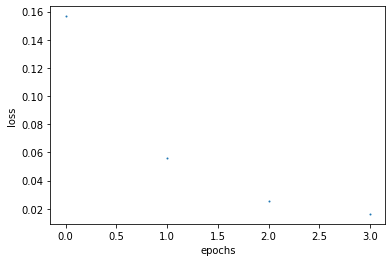

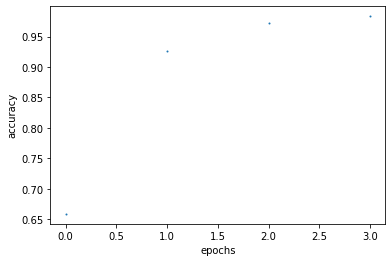

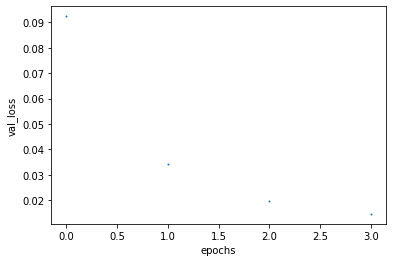

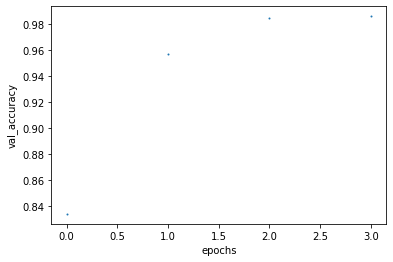

In [3]:
x = []
y = []

for i in range(10000):
    shape, img = make_random_image(64)
    x.append(img)
    
    shape_vector = np.array([0, 0, 0])
    shape_vector_index = shape_types.index(shape)
    shape_vector[shape_vector_index] = 1
    y.append(shape_vector)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape=(64, 64, 1), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation=tf.nn.relu),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.relu)
])

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['accuracy'])

history = model.fit(
    x=np.array(x), 
    y=np.array(y), 
    validation_split=0.1,
    epochs=4, 
    verbose=1)

for key in history.history.keys():
    values = history.history[key]
    plt.scatter(range(len(values)), values, s=1)
    plt.ylabel(key)
    plt.xlabel('epochs')
    plt.show()

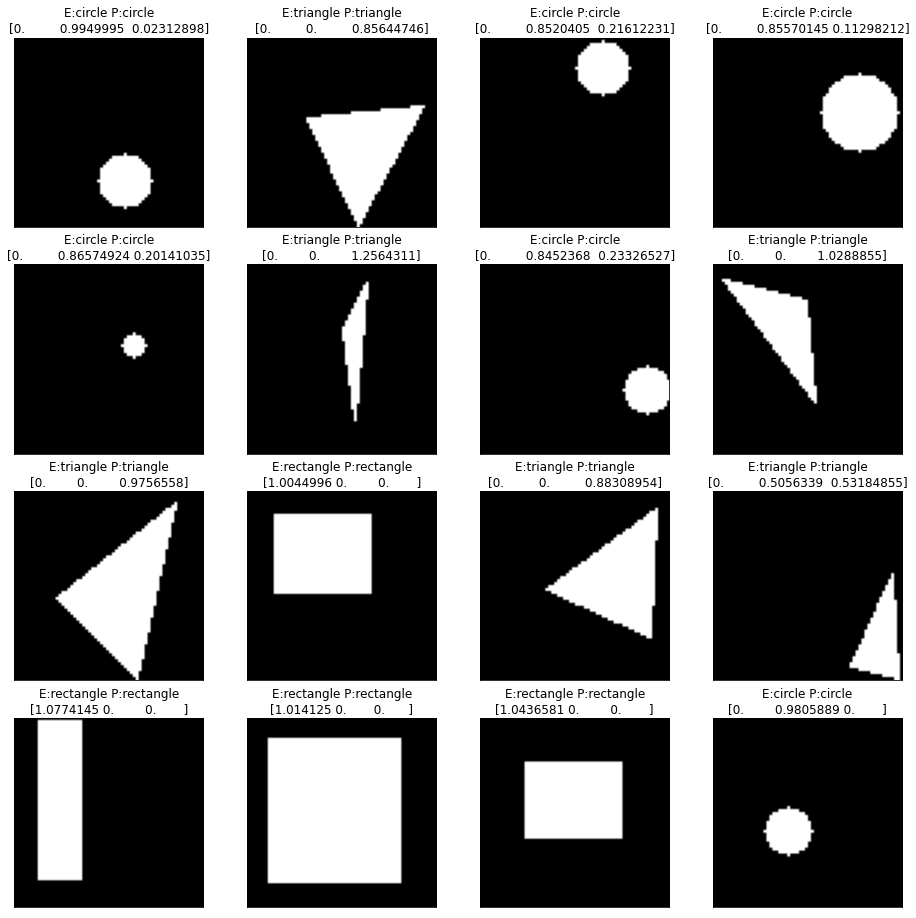

In [4]:
plt.figure(figsize=(16, 16))
for i in range(16):
    shape, img = make_random_image(64)
    prediction = model.predict(x=np.array([img]))
    prediction_category = np.argmax(prediction)
    
    plt.subplot(4, 4, i + 1)
    plt.title(f'E:{shape} P:{shape_types[prediction_category]}\n{prediction[0]}')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.gray)

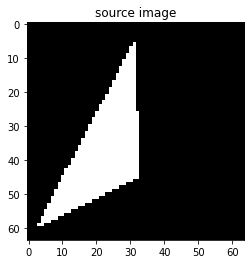

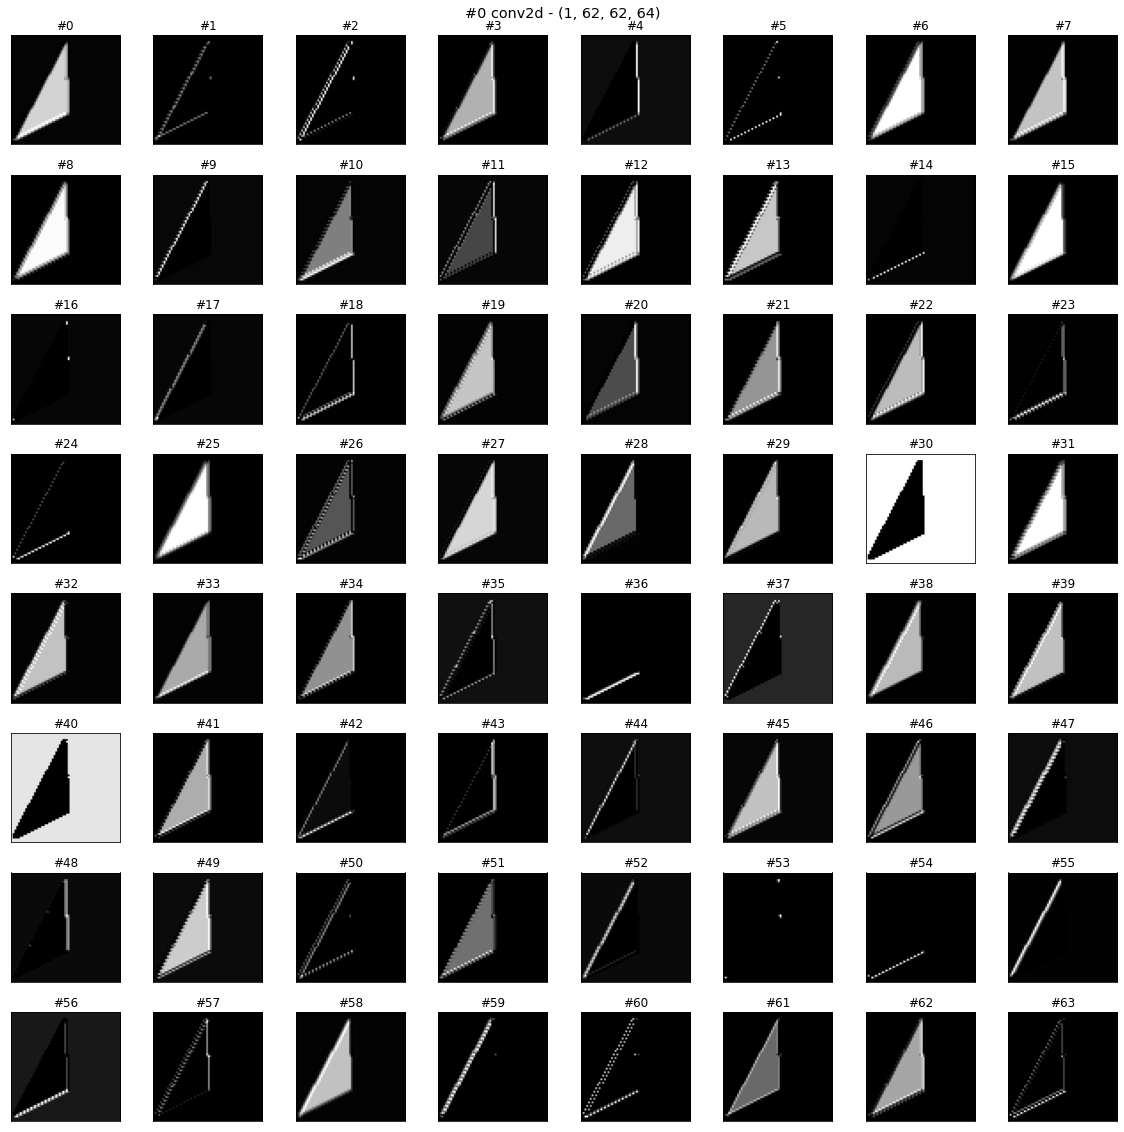

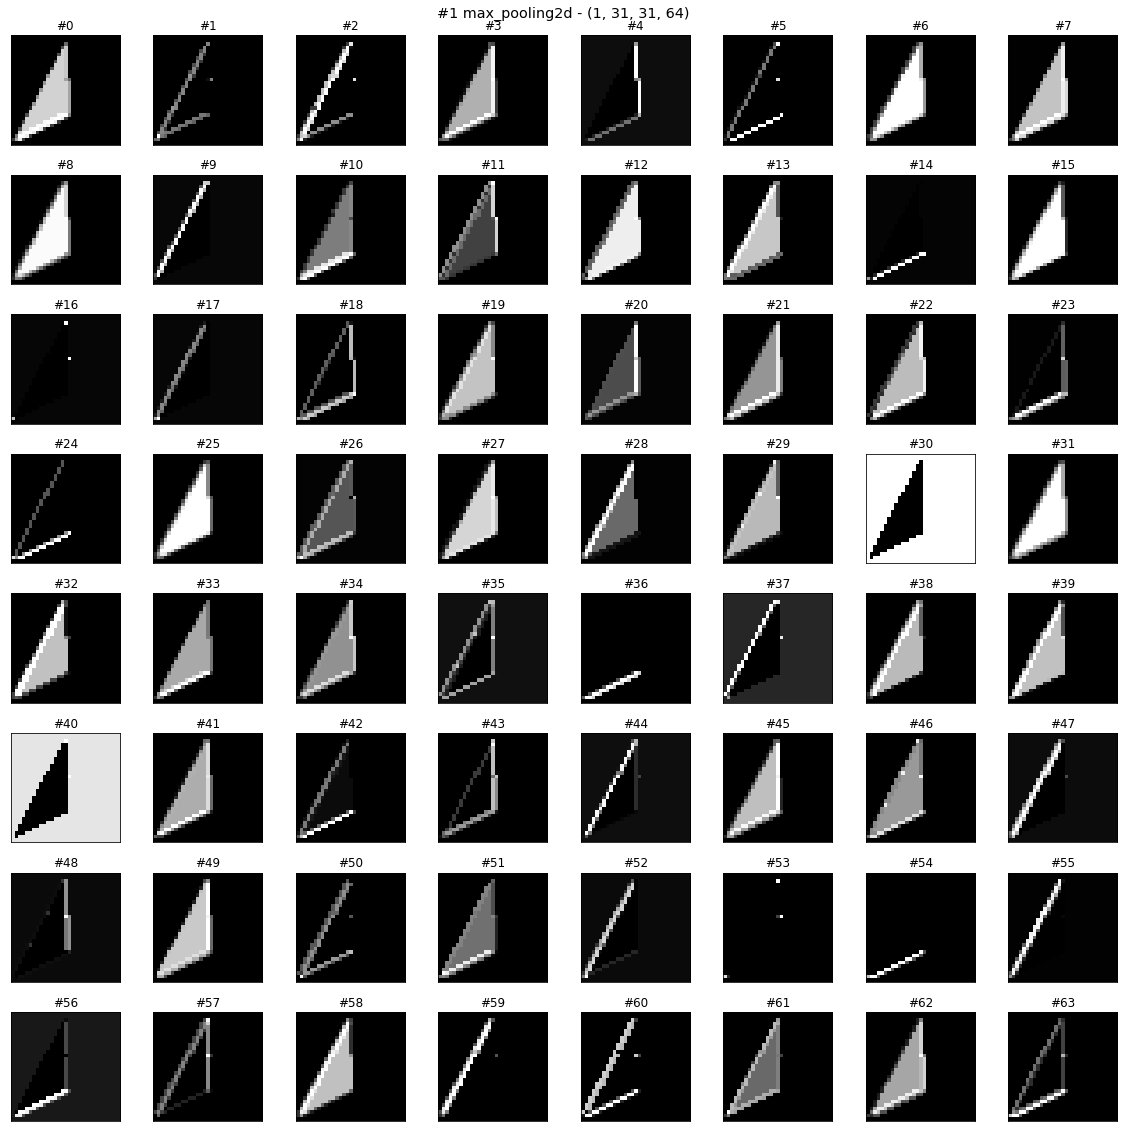

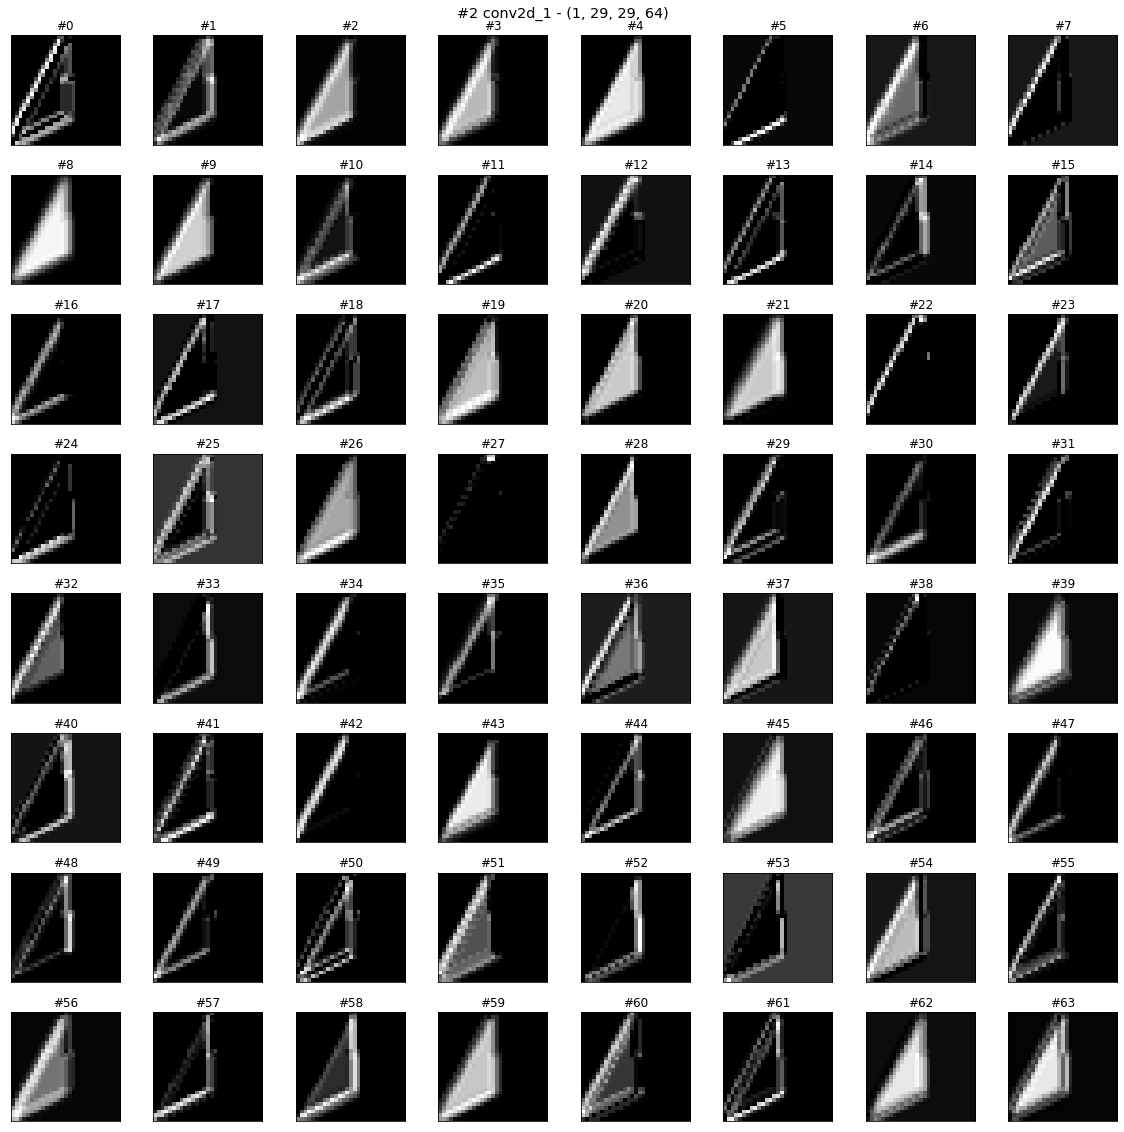

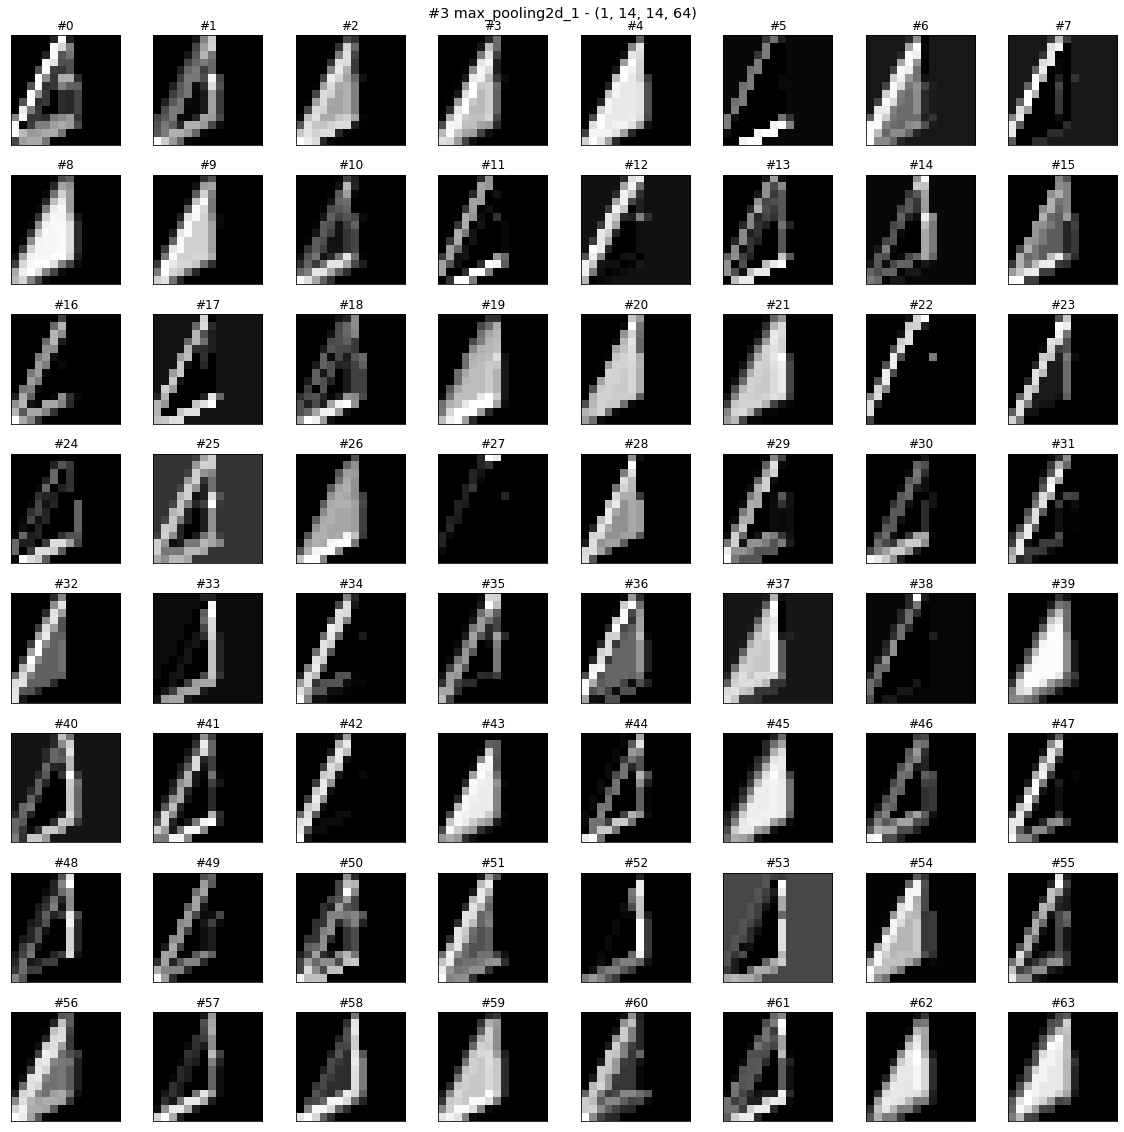

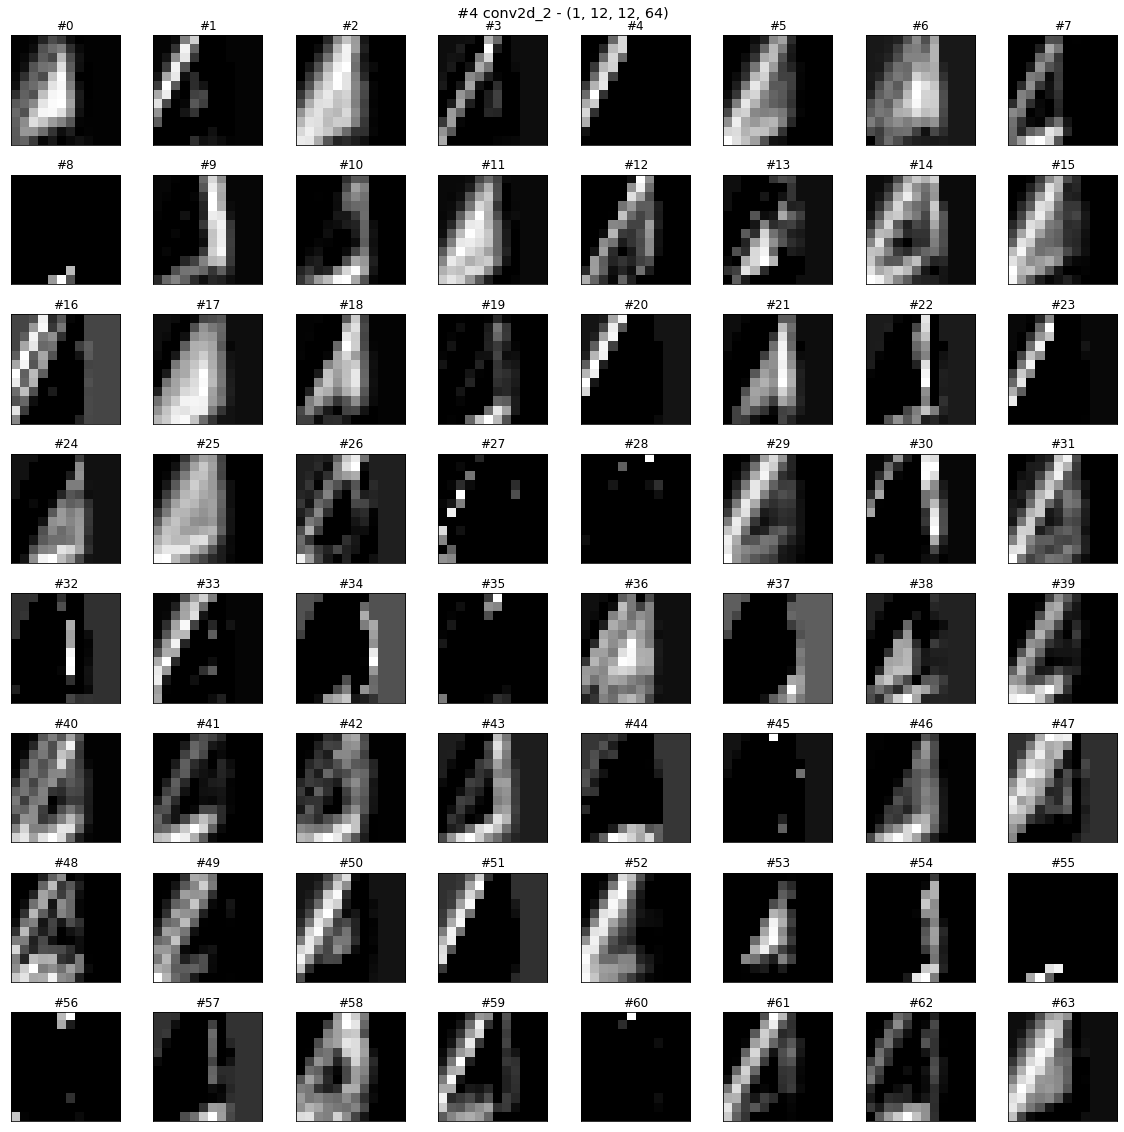

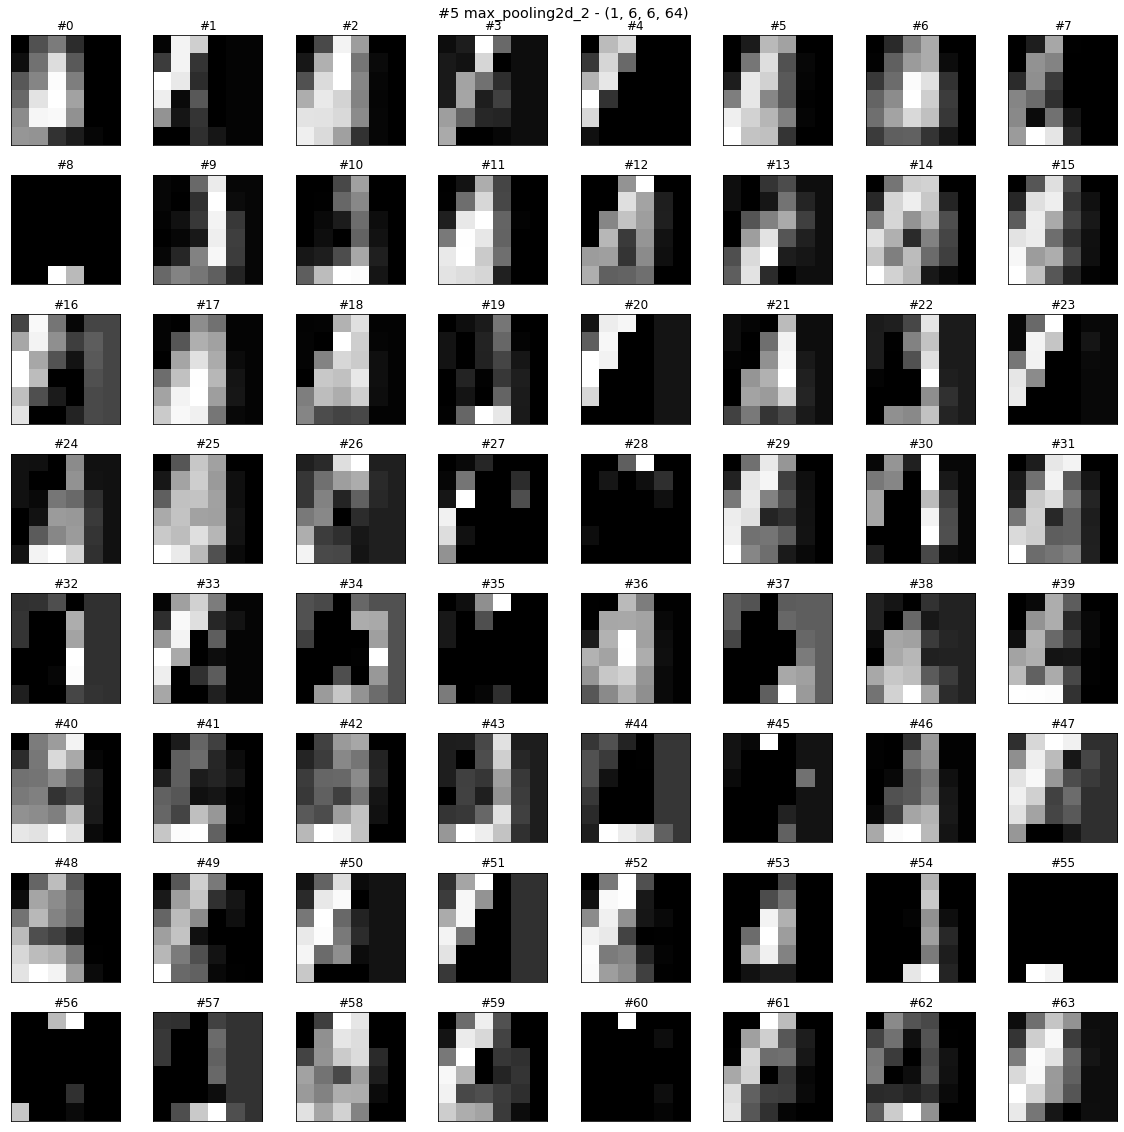

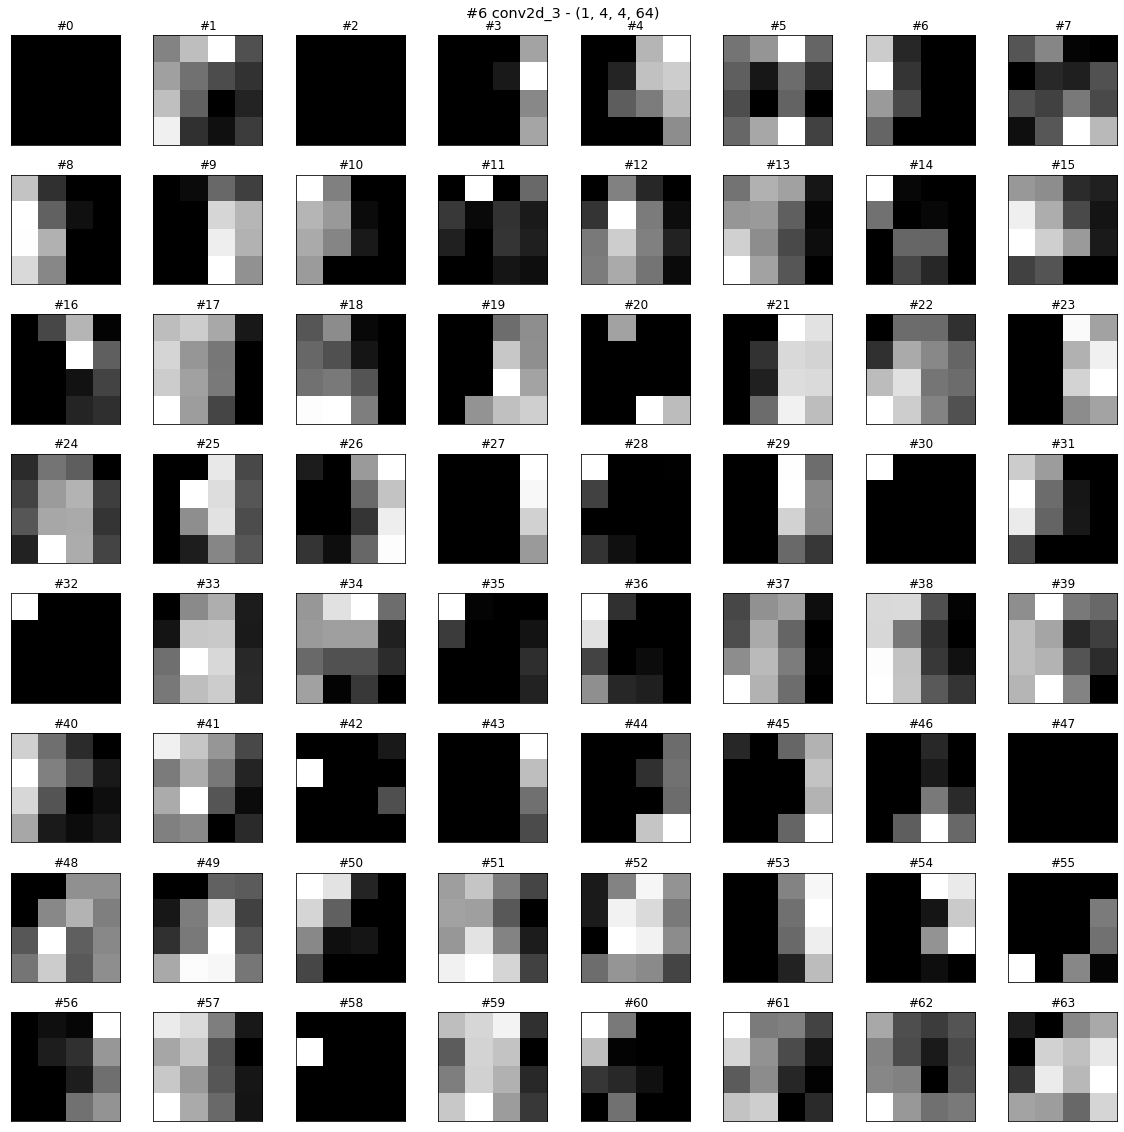

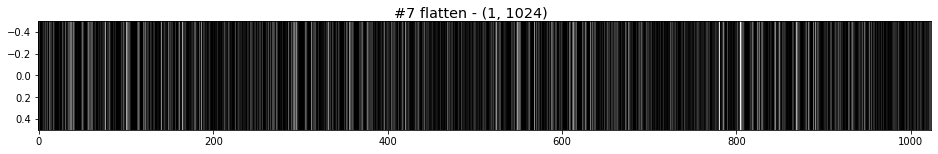

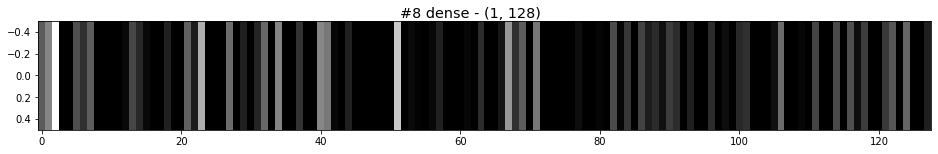

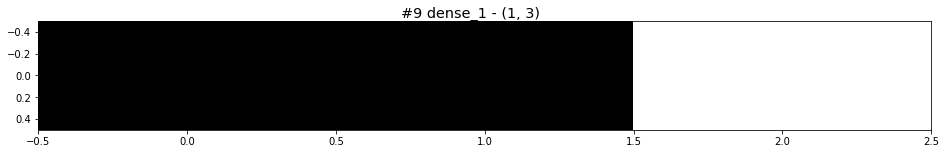

In [5]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

r = random.Random(5)
shape, img = make_random_image(64)
activations = activation_model.predict(x=np.array([img]))

plt.title('source image')
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

for layer_index, layer in zip(range(len(activations)), model.layers):
    title = f'#{layer_index} {layer.name} - {activations[layer_index].shape}'
    if layer.name.startswith('conv2d') or layer.name.startswith('max_pooling2d'):       
        plt.figure(figsize=(16, 16))
        plt.suptitle(title, fontsize='x-large')
        feature_count = activations[layer_index].shape[-1]
        for feature_index in range(feature_count):
            activation = activations[layer_index][0, :, :, feature_index]
            plt.subplot(8, 8, feature_index+1)
            plt.title(f'#{feature_index}')
            plt.xticks([])
            plt.yticks([])
            plt.imshow(activation, cmap=plt.cm.gray)
        plt.tight_layout()
        plt.show()
    elif layer.name.startswith('flatten'):
        plt.figure(figsize=(16, 2))
        plt.suptitle(title, fontsize='x-large')
        #plt.plot(activations[layer_index][0])
        plt.imshow([activations[layer_index][0]], cmap=plt.cm.gray, aspect='auto')
        plt.show()
    elif layer.name.startswith('dense'):
        plt.figure(figsize=(16, 2))
        plt.suptitle(title, fontsize='x-large')
        plt.imshow([activations[layer_index][0]], cmap=plt.cm.gray, aspect='auto')
        plt.show()
    else:
        print(f'Unknown layer type {layer.name}')